In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20190412/


In [2]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075', 'B1083-2']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1083-2': '/home/brad/krista/B1083/P03S05'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*windt                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'BCPairwiseCorrs2'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# Betti Parameters
analysis_id = 'BC'                # Generic lable
nperms = None                     # No permutation for each trial
ncellsperm = 33                   # Subsample 33 neurons from the population
dims = [0, 1, 2, 3]               # We want first four betti numbers
thresh = 4.0                     # Activation threshold
twin = np.linspace(0, 6000, 1000) # milliseconds

In [3]:
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf
    
    
    
#No Overlap
# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0                # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'FR_NoOver'        # BootStrap Populations
bdfs_noover = {}  
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs_noover[bird] = bdf

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-BCPairwiseCorrs2/20190211T171238Z-10.0-5.0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-BCPairwiseCorrs2/20190211T171248Z-10.0-5.0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-BCPairwiseCorrs2/20190211T171302Z-10.0-5.0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-BCPairwiseCorrs2/20190211T171311Z-10.0-5.0.binned
/home/brad/krista/B1083/P03S05/binned_data/win-10.0_dtovr-5.0_seg-0-0-BCPairwiseCorrs2/20190213T183654Z-10.0-5.0.binned
/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20190211T191640Z-10.0-0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20190211T191718Z-10.0-0.binned
/home/brad/krista/B1235/P02S01/binned_data/win

In [4]:
# This is only for the Empirical vs Fully Shuffled condition
shuffle_params = [False, True, False, False]
shuff_funcs = [None, None, tp2.shuffle_mask_within_stims, tp2.shuffle_mask_across_stims]
stypes = ['bc', 'bcs', 'bcsmw', 'bcsma']

def compute_betti_data(bird):
    betti_data = {}
    betti_data[bird] = {}
    bdf = bdfs[bird]
    block_path = bps[bird]

    # Compute the betti curves for the original data
    # bc
    (bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                             thresh, nperms, ncellsperm,
                                             dims, twin, windt, dtovr, shuffle=False)
    betti_data[bird]['bc'] = bc
    betti_data[bird]['t'] = t
    betti_data[bird]['t_ms'] = t_ms

    # Compute the betti curves for shuffled-in-time data
    # This breaks the inter-neuronal coordination
    # suffix: s
    (bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=True)
    betti_data[bird]['bcs'] = bcs
    betti_data[bird]['ts'] = ts
    betti_data[bird]['ts_ms'] = ts_ms
    
        # Compute the betti curves for shufflemask-withinstimulus data
    # suffix: st
    (bcst, tst, tst_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=False, shuffle_across_stims=tp2.shuffle_mask_within_stims)
    betti_data[bird]['bcsmw'] = bcst
    betti_data[bird]['tsmw'] = tst
    betti_data[bird]['tsmw_ms'] = tst_ms

    # Compute the betti curves for shufflemask-acrossstimulus data
    # suffix: sts
    (bcsts, tsts, tsts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                                thresh, nperms, ncellsperm,
                                                dims, twin, windt, dtovr, shuffle=False, shuffle_across_stims=tp2.shuffle_mask_across_stims)
    betti_data[bird]['bcsma'] = bcsts
    betti_data[bird]['tsma'] = tsts
    betti_data[bird]['tsma_ms'] = tsts_ms
    return betti_data

In [5]:
def build_betti_curve_tensor(betti_data, bird, shuffle_type='bc', betti=1, subtract_mean=False, normalize=False):
    '''
    Concatenates all betti curves into an (nstim*ntrial) x nsamples tensor
    '''
    betti_tensor = np.zeros((8*20,1000))
    bd = betti_data[bird][shuffle_type]
    stims = list(bd.keys())[0:8]
    for ind,stim in enumerate(stims):
        bc = bd[stim]
        if normalize:
            bc = normalize_betti_curves(bc)
        if subtract_mean:
            bc = subtract_mean_bc(bc)
        #print(bc.shape)
        for trial in range(20):
            betti_tensor[ind*20+trial, :] = bc[betti, :, trial]
    return betti_tensor

def build_pairwise_fr_tensor(bird):
    frs = np.zeros((8*20, 8*20))
    for ind1 in tqdm.tqdm_notebook(range(8*20)):
        for ind2 in tqdm.tqdm_notebook(range(ind1, 8*20)):
            stim1 = ind1 // 20
            trial1 = ind1 % 20
            stim2 = ind2 // 20
            trial2 = ind2 % 20
            frs[ind1, ind2] = get_mean_fr(bird, stim1, trial1, stim2, trial2)
    return frs

def compute_pairwise_cosine_similarity(betti_tensor):
    #bt = np.reshape(betti_tensor, (8*20,1000))
    bt = betti_tensor
    btnorms = np.sqrt(np.sum(bt**2, axis=1))
    btnorms = np.multiply.outer(btnorms, btnorms)
    #btsq = np.tensordot(bt, bt, axes=([1], [1]))
    btsq = np.dot(bt, bt.T) / 1000.
            
    return np.divide(btsq, btnorms)

def compute_pairwise_correlations(betti_tensor):
    return np.corrcoef(betti_tensor)
    

In [6]:
def compute_corr_distributions(betti_data, bird, shuffle_type, betti, subtract_mean=False, normalize=False):
    '''
    Compute the distributions of correlations between betti curves between stimuli and across stimuli
    '''
    btens = build_betti_curve_tensor(betti_data,bird, shuffle_type=shuffle_type, betti=betti, subtract_mean=subtract_mean, normalize=normalize)
    #cos_sim = compute_pairwise_cosine_similarity(btens)
    pairwise_correlations = compute_pairwise_correlations(btens)
    print(pairwise_correlations.shape)
    in_stim_corrs = []
    btwn_stim_corrs = []
    in_stim_frs = []
    btwn_stim_frs = []
    for stim in range(8):
        # Extract within-stimuli correlations
        stim_sim = pairwise_correlations[stim*20:(stim+1)*20, stim*20:(stim+1)*20]
        stim_sim_ut = stim_sim[np.triu_indices(20, 1)]
        in_stim_corrs.append(stim_sim_ut)

        # Extract between-stimuli correlations
        for stim2 in range(stim+1, 8):
            btwn_sim = pairwise_correlations[stim*20:(stim+1)*20, stim2*20:(stim2+1)*20].flatten()
            btwn_stim_corrs.append(btwn_sim)
    #print("Within: {}, Between: {}".format(len(in_stim_corrs), len(btwn_stim_corrs)))
    return (in_stim_corrs, btwn_stim_corrs)

import h5py as h5
def get_mean_fr(bird, stimA, trialA, stimB, trialB):
    bdf = bdfs_noover[bird]
    
    
    with h5.File(bdf, 'r') as f:
        stims = list(f.keys())
        trialA = np.array(f[stims[stimA]]['pop_tens'])[:, :, trialA]
        trialB = np.array(f[stims[stimB]]['pop_tens'])[:, :, trialB]
        
    mean_fr = np.mean(np.hstack([trialA, trialB]))
    return mean_fr

def compute_fr_distrib(bird, fr_tensor):
    frs = fr_tensor[bird]
    in_stim_frs = []
    btwn_stim_frs = []
    for stim in range(8):
        # Compute within-stimuli fRS
        stim_fr_sim = frs[stim*20:(stim+1)*20, stim*20:(stim+1)*20]
        stim_fr_sim_ut = stim_fr_sim[np.triu_indices(20, 1)]
        in_stim_frs.append(stim_fr_sim_ut)
        
        
        # Extract between-stimuli correlations
        for stim2 in range(stim+1, 8):
            btwn_fr_sim = frs[stim*20:(stim+1)*20, stim2*20:(stim2+1)*20].flatten()
            btwn_stim_frs.append(btwn_fr_sim)
    #print("Within: {}, Between: {}".format(len(in_stim_frs), len(btwn_stim_frs)))
    return (in_stim_frs, btwn_stim_frs)

In [7]:
stypes = ['bc', 'bcs', 'bcsmw', 'bcsma']
import tqdm
bc_distrib_data = {}
fr_distrib_data = {}
for bird in birds:
    bc_distrib_data[bird] = {}
    for betti in [0,1,2]:
        bc_distrib_data[bird][betti] = {}
        for shuffle_type in stypes:
            bc_distrib_data[bird][betti][shuffle_type] = []
            
nreps = 1
for rep in tqdm.tqdm(range(nreps)):
    for bird in birds:
        betti_data = compute_betti_data(bird)
        #print(bird, betti_data.keys())
        for betti in [0, 1,2]:
            for shuffle_type in stypes:
                corr_distribs = compute_corr_distributions(betti_data, bird, shuffle_type, betti, subtract_mean=False, normalize=False)
                bc_distrib_data[bird][betti][shuffle_type] = corr_distribs
                
import pickle
with open(os.path.join(figsavepth, 'bc_correlation_distrib2.pkl'), 'wb') as f:
    pickle.dump(bc_distrib_data, f)

  0%|          | 0/1 [00:00<?, ?it/s]/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 1/1 [08:52<00:00, 532.55s/it]

(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


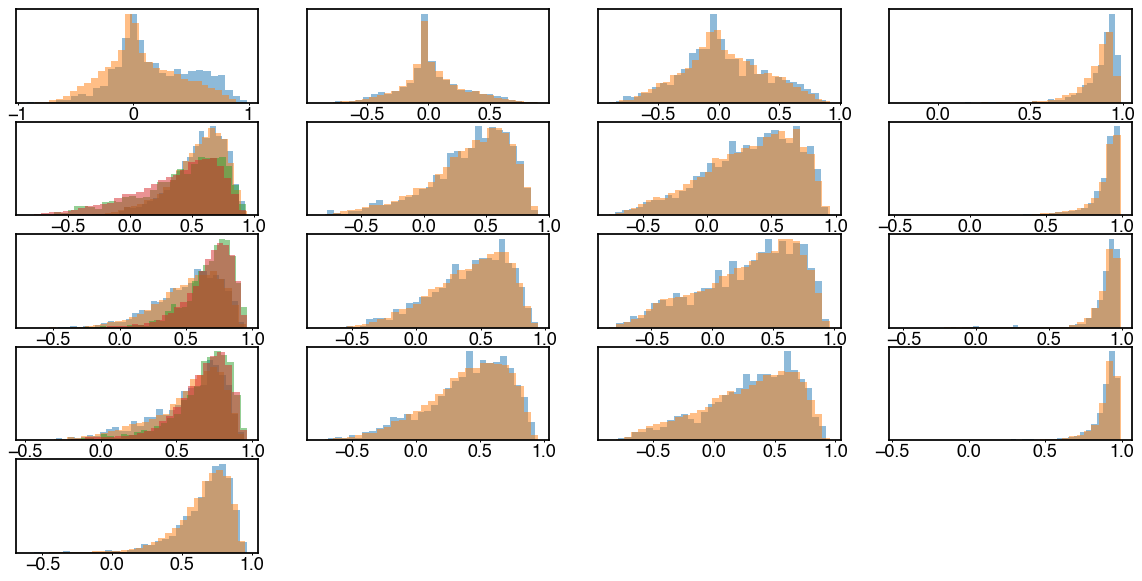

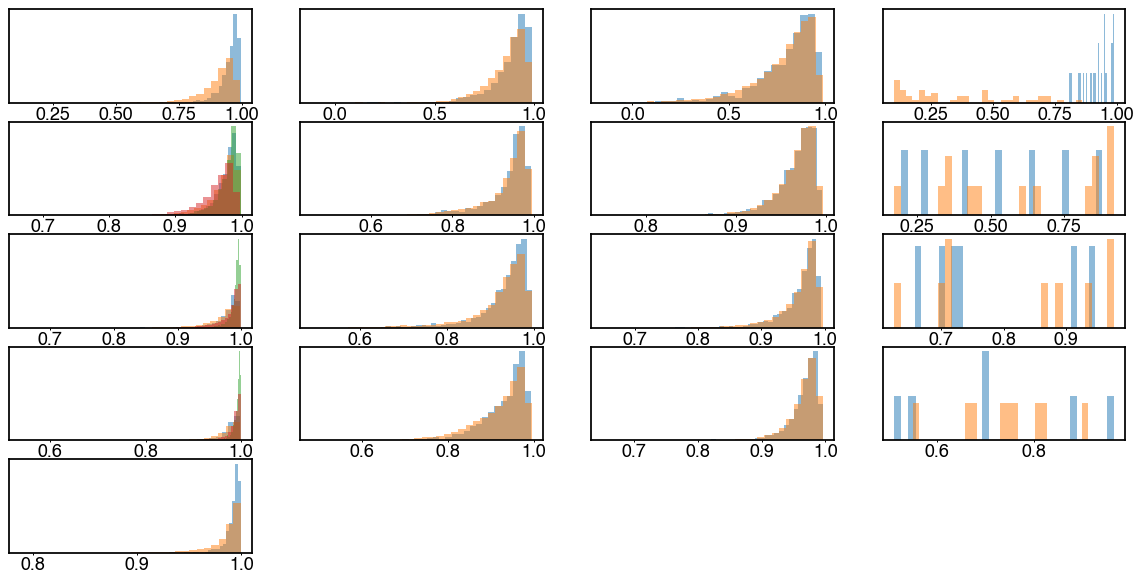

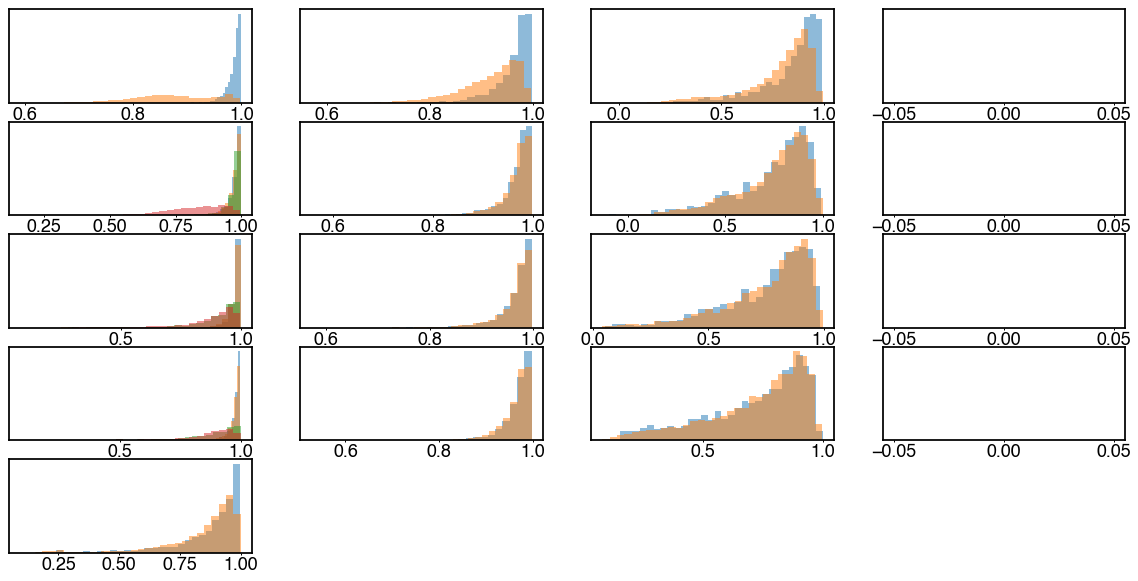

In [8]:
# type_labels = ['Orig', 'Full', 'Within', 'Across', 'AcrossWhole']
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
for betti in [0,1,2]:
    plotdat = []
    fig = plt.figure(figsize=(20,10))
    #print('\n\n')
    for ind, bird in enumerate(birds):
        
        #print('\n')
        plotdat=[]
        for ind2, tp in enumerate(stypes):
            in_stim, btwn_stim = bc_distrib_data[bird][betti][tp]
            in_stim = np.array(in_stim).flatten()
            btwn_stim = np.array(btwn_stim).flatten()
            in_stim = in_stim[~np.isnan(in_stim)]
            btwn_stim = btwn_stim[~np.isnan(btwn_stim)]
            #print(5*ind+ind2)
            ax = fig.add_subplot(5, 4, ind+4*ind2+1)
            
            ax.hist(in_stim, bins=30, alpha=0.5, density=True)
            ax.hist(btwn_stim, bins=30, alpha=0.5, density=True)
            ax.set_yticks([])
            
            #print(bc_distrib_data[bird][betti][tp])
    #plt.title('{} Betti {} Type {}'.format(bird, betti, tp))
    plt.savefig(figsavepth+'Betti{}-distrib.pdf'.format(betti))
#     plt.title('{} Betti {}'.format(bird, betti))

In [8]:
fr_tensor = {x: build_pairwise_fr_tensor(x) for x in birds}

In [9]:
import pandas as pd
def build_dataframe(bc_distrib_data, betti, fr_tensor):
    data_dict = {'Bird': [], 'Type':[], 'Pair': [], 'Corr': [], 'FR': []}
    for bird in birds:
        bird_data = bc_distrib_data[bird]
        (fr_within, fr_between) = compute_fr_distrib(bird, fr_tensor)
        fr_within = np.hstack(fr_within)
        fr_between = np.hstack(fr_between)
        for stype in stypes:
            bs_data = bird_data[betti][stype]

            within = bs_data[0]
            all_stim_within = np.hstack(within)
            between = bs_data[1]
            all_stim_between = np.hstack(between)
            
            blist = [bird]*(len(all_stim_within) + len(all_stim_between))
            tlist = [stype]*(len(all_stim_within) + len(all_stim_between))
            plist = [1]*len(all_stim_within)
            plist2 = [2]*len(all_stim_between)
            
            data_dict['Bird'] += blist
            data_dict['Type'] += tlist
            data_dict['Corr'] += (list(all_stim_within) + list(all_stim_between))
            data_dict['Pair'] += (plist + plist2)
            data_dict['FR'] += (list(fr_within) + list(fr_between))

    return pd.DataFrame.from_dict(data_dict)
            

In [16]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova
betti = 2
data = build_dataframe(bc_distrib_data, betti, fr_tensor).dropna()
data_bc=data[data["Type"]=='bc']
data_bcs = data[data["Type"] == 'bcs']
data_bcsmw = data[data["Type"] == 'bcsmw']
data_bcsma = data[data["Type"] == 'bcsma']

model="Corr ~ Pair + FR + Pair*FR"

md = smf.mixedlm(model, data_bc, groups=data_bc["Bird"])
mdf = md.fit()
print(mdf.summary())

print(mdf.tvalues)
print(mdf.pvalues)

md = smf.mixedlm(model, data_bcs, groups=data_bcs["Bird"])
mdf = md.fit()
print(mdf.summary())

print(mdf.tvalues)
print(mdf.pvalues)

md = smf.mixedlm(model, data_bcsmw, groups=data_bcsmw["Bird"])
mdf = md.fit()
print(mdf.summary())

print(mdf.tvalues)
print(mdf.pvalues)

md = smf.mixedlm(model, data_bcsma, groups=data_bcsma["Bird"])
mdf = md.fit()
print(mdf.summary())

print(mdf.tvalues)
print(mdf.pvalues)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Corr      
No. Observations: 37784   Method:             REML      
No. Groups:       4       Scale:              0.0261    
Min. group size:  4753    Likelihood:         15255.2149
Max. group size:  12720   Converged:          Yes       
Mean group size:  9446.0                                
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     0.925    0.076  12.206 0.000  0.776  1.073
Pair         -0.149    0.010 -15.603 0.000 -0.167 -0.130
FR           -0.001    0.008  -0.095 0.924 -0.016  0.014
Pair:FR       0.031    0.004   8.096 0.000  0.023  0.038
Group Var     0.021    0.123                            

Intercept    12.206088
Pair        -15.602865
FR           -0.094917
Pair:FR       8.096425
Group Var     1.081992
dtype: float64
Intercept    2.884288e-3

In [ ]:
data_bc.boxplot(column="Corr", by="Pair")

In [ ]:

data_bcs.plot.scatter("FR", "Corr")

In [ ]:
data_bc["FR"].hist(bins=40)

In [ ]:
# type_labels = ['Orig', 'Full', 'Within', 'Across', 'AcrossWhole']
#plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
plt.style.use('default')
#bird_xlims=[0.6, 0.5, -0.12]
for betti in [2]:
    plotdat = []
    fig = plt.figure(figsize=(15, 9))
    #print('\n\n')
    for ind, bird in enumerate(birds[0:3]):
        bird_axs = []
        bird_min = 1.0
        
        #print('\n')
        plotdat=[]
        for ind2, tp in enumerate(stypes):
            in_stim, btwn_stim = bc_distrib_data[bird][betti][tp]
            in_stim = np.array(in_stim).flatten()
            btwn_stim = np.array(btwn_stim).flatten()
            in_stim = in_stim[~np.isnan(in_stim)]
            btwn_stim = btwn_stim[~np.isnan(btwn_stim)]
            #print(5*ind+ind2)
            ax = fig.add_subplot(3, 5, ind2+5*ind+1)
            
            ax.hist(in_stim, bins=30, alpha=0.5, density=True)
            ax.hist(btwn_stim, bins=30, alpha=0.5, density=True)
            ax.set_yticks([])
            for a in ax.get_xticklabels():
                a.set_fontname('Helvetica')
                a.set_fontsize(12)

            bird_axs.append(ax)
            hist_min = np.amin([np.amin(in_stim), np.amin(btwn_stim)])
            bird_min = np.amin([bird_min, hist_min])
        bird_min = bird_xlims[ind]

    plt.savefig(figsavepth+'BC_correlation_plot.pdf')

In [12]:
import h5py as h5
def get_mean_fr(bird, stimA, trialA, stimB, trialB):
    bdf = bdfs_noover[bird]
    
    
    with h5.File(bdf, 'r') as f:
        stims = list(f.keys())
        trialA = np.array(f[stims[stimA]]['pop_tens'])[:, :, trialA]
        trialB = np.array(f[stims[stimB]]['pop_tens'])[:, :, trialB]
        
    mean_fr = np.mean(np.hstack([trialA, trialB]))
    return mean_fr

In [11]:
#No Overlap
# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0                # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'FR_NoOver'        # BootStrap Populations
bdfs_noover = {}  
# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs_noover[bird] = bdf

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20190211T191640Z-10.0-0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20190211T191718Z-10.0-0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20190211T191732Z-10.0-0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20190211T191742Z-10.0-0.binned
Data Not already binned
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
Nreps = 20
skip = 200
dur = 120000.0
nwins = 600
/home/brad/krista/B1083/P03S05/binned_data/win-10.0_dtovr-0_seg-0-0-FR_NoOver/20

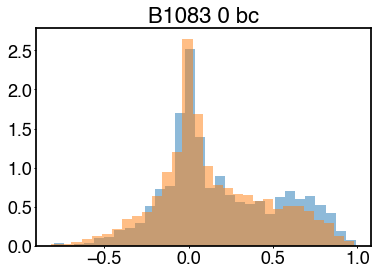

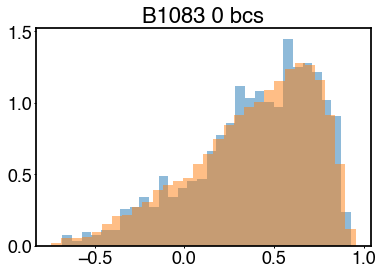

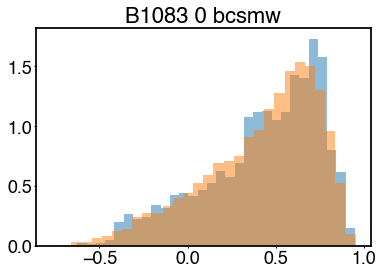

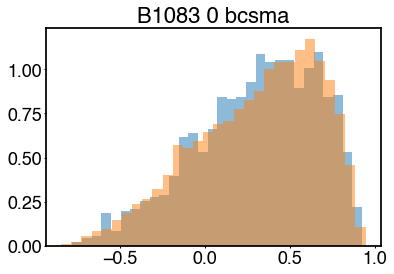

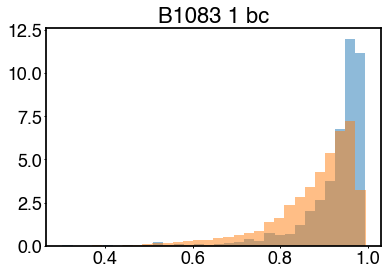

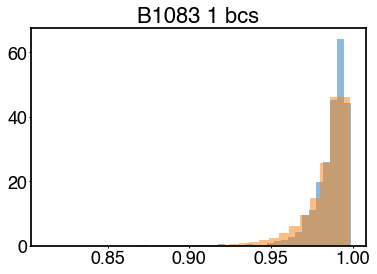

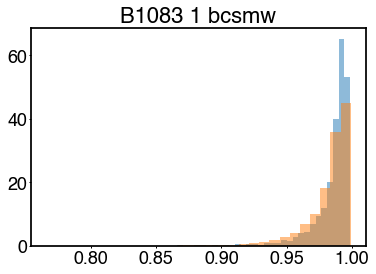

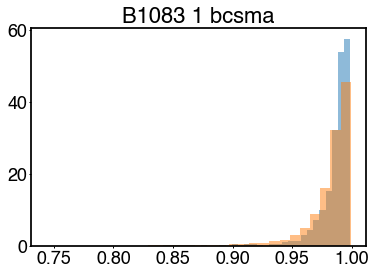

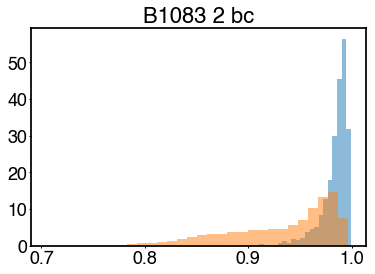

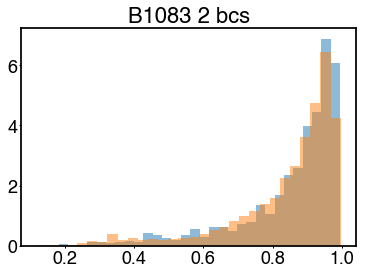

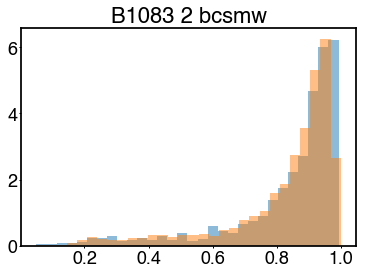

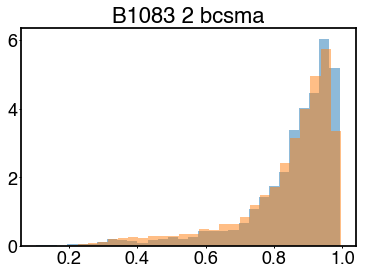

In [11]:
# type_labels = ['Orig', 'Full', 'Within', 'Across', 'AcrossWhole']
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
for betti in [0,1,2]:
    plotdat = []
    fig = plt.figure(figsize=(20,10))
    #print('\n\n')
    for ind, bird in enumerate(['B1083']):
        
        #print('\n')
        plotdat=[]
        for ind2, tp in enumerate(stypes):
            in_stim, btwn_stim = bc_distrib_data[bird][betti][tp]
            in_stim = np.array(in_stim).flatten()
            btwn_stim = np.array(btwn_stim).flatten()
            in_stim = in_stim[~np.isnan(in_stim)]
            btwn_stim = btwn_stim[~np.isnan(btwn_stim)]
            #print(5*ind+ind2)
            plt.figure()
            
            plt.hist(in_stim, bins=30, alpha=0.5, density=True)
            plt.hist(btwn_stim, bins=30, alpha=0.5, density=True)
            plt.title('{} {} {}'.format(bird, betti, tp))
            #ax.set_yticks([])
            
            #print(bc_distrib_data[bird][betti][tp])
    #plt.title('{} Betti {} Type {}'.format(bird, betti, tp))
            plt.savefig(figsavepth+'{}_{}_{}_bcdistrib.pdf'.format(bird, betti, tp))
#     plt.title('{} Betti {}'.format(bird, betti))